# Socio-economic data


In [35]:
import pandas as pd
xls = pd.ExcelFile('data/demographics_2015-2019.xlsm')
df2 = pd.read_excel(xls, 'Race')
res = len(xls.sheet_names)
for i in xls.sheet_names:
    print(i)
print(len(xls.sheet_names))

Age
Household Type
Race
Group Quarters Population
Nativity
Geographic Mobility
Educational Attainment
School Enrollment
Means of Commuting
Travel Time to Work
Place of Work
Per Capita Income
Occupation
Industries
Labor Force
Household Income
Family Income
Housing Tenure
Bedrooms
Vacancy Rates
Vehicles per Household
Poverty Rates
Poverty Rates by Age
23


In [36]:
df2.head()

,Race & Ethnicity,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,45858,NaN,3478,NaN,9275,NaN,12971,NaN,2976,74558
1,NaN,Total Population,White Alone,%,Black/African-American,%,Hispanic,%,Asian alone,%,Other Races,%
2,United States,324697795,197100373,0.607027,39977554,0.123122,58479370,0.180104,17708954,0.05454,11431544,0.035207
3,Massachusetts,6850553,4903539,0.715787,473181,0.069072,809179,0.118119,449793,0.065658,214861,0.031364
4,Boston,684379,304524,0.444964,155096,0.226623,135757,0.198365,65613,0.095872,23389,0.034176


In [37]:
df2.columns = df2.iloc[1]
df2 = df2.iloc[2:]

In [38]:
df2.head()

1,NaN,Total Population,White Alone,%,Black/African-American,%,Hispanic,%,Asian alone,%,Other Races,%
2,United States,324697795,197100373,0.607027,39977554,0.123122,58479370,0.180104,17708954,0.05454,11431544,0.035207
3,Massachusetts,6850553,4903539,0.715787,473181,0.069072,809179,0.118119,449793,0.065658,214861,0.031364
4,Boston,684379,304524,0.444964,155096,0.226623,135757,0.198365,65613,0.095872,23389,0.034176
5,Allston,19261,9839,0.510825,1099,0.057058,2586,0.134261,4811,0.249779,926,0.048076
6,Back Bay,17783,13044,0.73351,761,0.042794,1715,0.09644,1917,0.1078,346,0.019457


When correlated with budgeting data, this data can provide insights into how resources are distributed among different demographic groups. There are 23 sheets in this excel spreadsheet file. Included within it is data on different demographics such as race, age, school enrollment, etc. An example of how we can use this in the socio-economic extension is to see if certain neighborhoods with higher populations of a demographic are receiving more funding, or if areas with lower/higher household income are receiving more funding. 

# Economic Data - Affordable Housing

In [39]:
df = pd.read_csv("data/income-restricted-housing-inventory-2022.csv")

In [40]:
df.head()

,Project_Name,Neighborhood,Zip Code,TtlProjUnits,RentUnits,OwnUnits,TtlMarket,MarketRent,MarketOwn,Total Income-Restricted,Income-Restricted Rental,Income-Restricted Ownership,Tenure,Public/ Private,Includes Senior Units?,Section 8
0,Abbot Street/ Shawmut Ave,Roxbury,2119.0,16,16,0,0.0,0.0,0.0,16,16,0.0,Rental,Private,NaN,NaN
1,Academy Homes I,Roxbury,2119.0,202,202,0,52.0,52.0,0.0,150,150,0.0,Rental,Private,NaN,NaN
2,Academy Homes II,Roxbury,2119.0,236,236,0,0.0,0.0,0.0,236,236,0.0,Rental,Private,NaN,Y
3,Adams Court Phase A,Mattapan,2126.0,50,50,0,0.0,0.0,0.0,50,50,0.0,Rental,Private,NaN,NaN
4,Adams Court Phase B,Mattapan,2126.0,45,45,0,0.0,0.0,0.0,45,45,0.0,Rental,Private,NaN,NaN


In [41]:
df = df.groupby('Neighborhood')['Total Income-Restricted'].sum()

In [42]:
df.head()

Neighborhood
Allston             931
Allston/Brighton     61
Back Bay            681
Bay Village          40
Beacon Hill         343
Name: Total Income-Restricted, dtype: int64

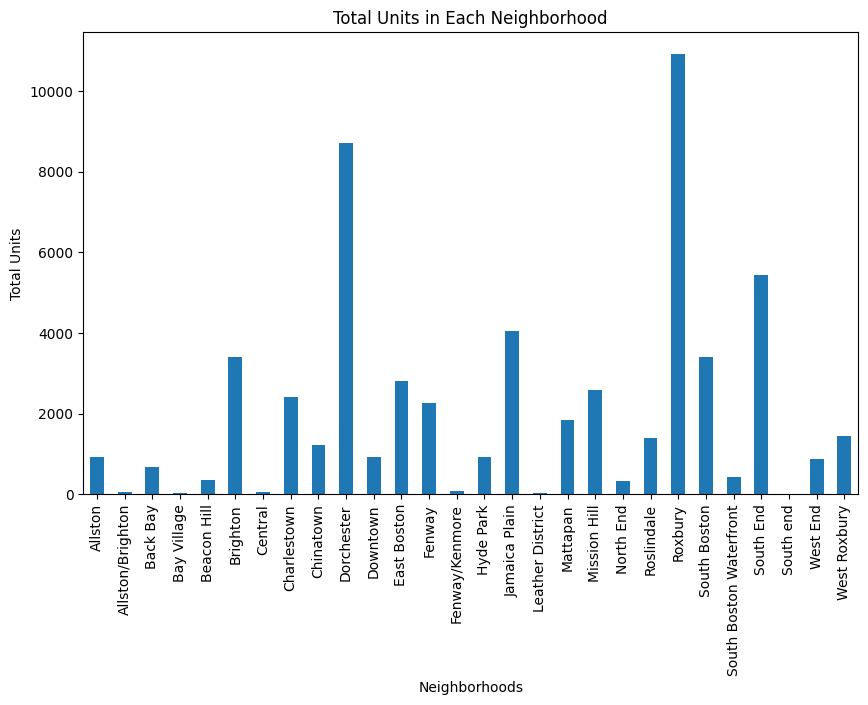

In [43]:
import matplotlib.pyplot as plt

df.plot(kind='bar', x='Neighborhoods', y='Total Units', figsize=(10, 6))

plt.title('Total Units in Each Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Total Units')

plt.show()


In the graphs and data presented above, it's evident that specific neighborhoods are allocated more affordable housing. It's important to note that this data is from 2022. By delving into previous years' data, we can uncover trends—whether there's been an increase or decrease in affordable housing within certain neighborhoods over the years. Linking this analysis to our budget assessment, we can ascertain whether neighborhoods with a higher prevalence of affordable housing receive a proportionate allocation of the city's budget for various needs.

# Weather Data

In [44]:
import requests
request1 = 'https://api.weather.gov/points/71.07433319091797,42.360478319401096'
response = requests.get('https://api.weather.gov/points/71.07433319091797,42.360478319401096')

# Check the status code of the response
if response.status_code == 200:
    print('Request was successful.')
    # Parse the response as JSON
    data = response.json()
else:
    print(f'Request failed with status code {response.status_code}')

Request failed with status code 404


In [45]:
data

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   's': 'https://schema.org/',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#',
   'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'},
   'city': 's:addressLocality',
   'state': 's:addressRegion',
   'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'},
   'bearing': {'@type': 's:QuantitativeValue'},
   'value': {'@id': 's:value'},
   'unitCode': {'@id': 's:unitCode', '@type': '@id'},
   'forecastOffice': {'@type': '@id'},
   'forecastGridData': {'@type': '@id'},
   'publicZone': {'@type': '@id'},
   'county': {'@type': '@id'}}],
 'id': 'https://api.weather.gov/points/38.8894,-77.0352',
 'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-77.0352, 38.8894]},
 'properties': {'@id': 'https://api.weather.gov/p

# Individual Departments

In [52]:
# df = pd.read_csv("data/checkbook_explorerfy21.csv")
# I tried 2022 and 2021 but it gives an encoding error
df = pd.read_csv("data/checkbook-explorer-fy16.csv")

C:\Users\BF\AppData\Local\Temp\ipykernel_14292\4265841948.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/checkbook-explorer-fy16.csv")


In [53]:
df.head()

,voucher,voucher_line,distribution_line,entered,month_number,fiscal_month,month,fiscal_year,year,vendor_name,account,account_descr,dept,dept_name,c6_digit_org_name,monetary_amount
0,2168567,1,1,7/1/2015,7,1,July,2016,2015,"McGovern, Susan",52907,Cont Serv Other,303100,Environment Department,Environment,1017.00
1,2168864,1,1,7/2/2015,7,1,July,2016,2015,Shred-It US JV LLC,52907,Cont Serv Other,221300,Fire Department,Fire Alarm,60.00
2,2172634,1,1,7/2/2015,7,1,July,2016,2015,"Grimes Oil Co., Inc.",52207,Utilities Heating Oil,400100,Cemetery Division,Cemetery,202.30
3,2174043,1,1,7/7/2015,7,1,July,2016,2015,Zoll Medical Corp.,55911,Equipment Other,221203,Fire Department,Technical Rescue,4309.50
4,2174663,17,1,7/9/2015,7,1,July,2016,2015,"Sprint Solutions, Inc.",52109,Equipment,136100,Assessing Department,Operations,959.76


In [58]:
for column_name in df.columns:
    unique_count = df[column_name].nunique()
    print(f"{column_name}: {unique_count}")

voucher: 76249
voucher_line: 193
distribution_line: 50
entered: 246
month_number: 12
fiscal_month: 12
month: 12
fiscal_year: 1
year: 2
vendor_name: 5635
account: 163
account_descr: 163
dept: 450
dept_name: 66
c6_digit_org_name: 439
monetary_amount: 45455


In [59]:
df = df.groupby('dept_name')['monetary_amount'].sum()

In [60]:
df.head()

dept_name
Administration & Finance          5.379000e+03
Assessing Department              7.287108e+05
Auditing Department               3.737361e+05
Boston Center-Youth & Families    6.363942e+06
Boston Public School Dept         2.970017e+08
Name: monetary_amount, dtype: float64

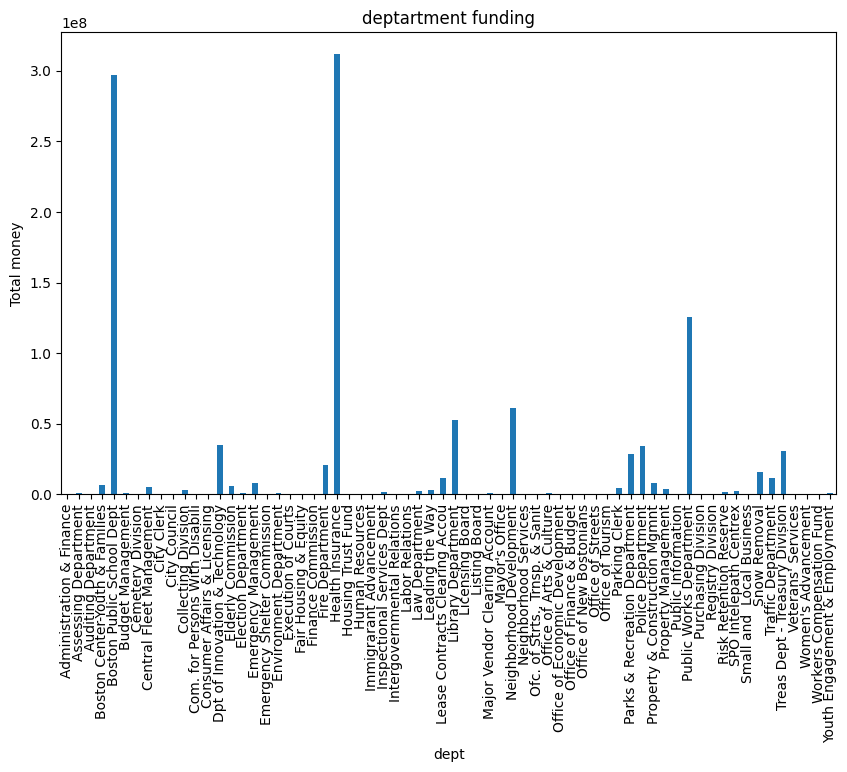

In [61]:
df.plot(kind='bar', x='dept_name', y='Total Units', figsize=(10, 6))

plt.title('deptartment funding')
plt.xlabel('dept')
plt.ylabel('Total money')

plt.show()

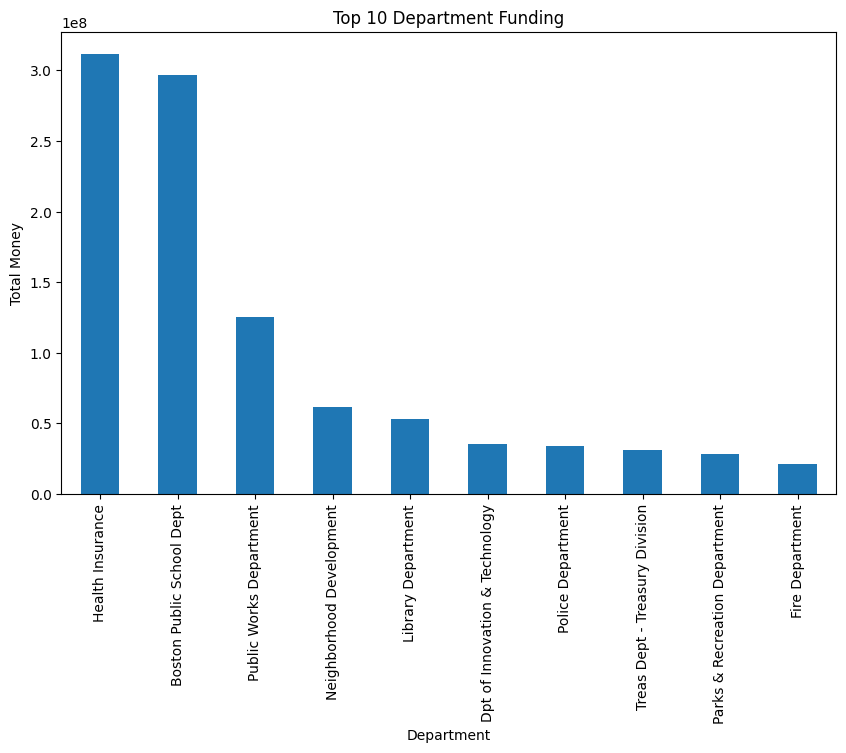

In [74]:
top_10 = df.nlargest(10)

top_10.plot(kind='bar', figsize=(10, 6))

plt.title('Top 10 Department Funding')
plt.xlabel('Department')
plt.ylabel('Total Money')

plt.show()

We can analyze where the money is being spent in health insurance and bps deptartment since those are where most of the money is being spent. We can look at the account_name and vendor_descr columns to further investigate where this money is being spent. The csv files for 2022 and 2021 were giving errors so I used 2016 here bc that was what worked. 